## Download data


In [1]:
# HMA: Automate data download for AWS spot usage 
# Check / Download / Unzip - Traffic Sign Dataset

import os
simulationData_DIR = './00-proj-simulationDataUdacity'
simulationData_ZIP = './00-proj-simulationDataUdacity.zip'

if not(os.path.isdir(simulationData_DIR)):
    if not(os.path.exists(simulationData_ZIP)):
        # Download Dataset zipfile if DIR and ZIP file do not exist
        import urllib.request
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip'
        print("Downloading Simulation Data...")
        urllib.request.urlretrieve(url, simulationData_ZIP)
    
    # Unzip Dataset zipfile
    if (os.path.exists(simulationData_ZIP)):
        print("Unzipping Simulation Data...")
        os.makedirs(simulationData_DIR)
        import zipfile
        zip_ref = zipfile.ZipFile(simulationData_ZIP, 'r')
        zip_ref.extractall(simulationData_DIR)
        zip_ref.close()
print("Dataset ready.")

Dataset ready.


## Import data

In [2]:
# Read log file
# [0] center image
# [1] left image
# [2] right image
# [3] steering angle

import csv

log_DIR = os.path.join(simulationData_DIR, 'data')
log_FILE = 'driving_log.csv'
driving_log = []
with open(os.path.join(log_DIR, log_FILE)) as csvfile:
    reader = csv.reader(csvfile, escapechar=' ')
    for line in reader:
        driving_log.append(line)

driving_log = driving_log[1:] # crop CSV titles
pass

In [3]:
# Declare Input Image Dataset and Label variables

imgSet = []
angleLabel = []

In [4]:
# Function: importImageAngle
# Desc: Import images (input data) and steering angles (associated label)

import cv2
img_DIR = log_DIR
steeringAngleIndex = 3

def importImageAngle(index = 0, deltaAngle = 0.0):
    global imgSet
    global angleLabel
    for log_entry in driving_log:
        img_FILE = log_entry[index]
        img = cv2.imread(os.path.join(img_DIR, img_FILE))
        imgSet.append(img)
        angleLabel.append(float(log_entry[steeringAngleIndex]) + deltaAngle)

Perform steps to augment the training data:
- Use captured images from the left camera with steering angle minus delta as example image to return to the center
- Use captured images from the right camera with steering angle plux delta as example image to return to the center

These operations are already part of Data augmentation.

In [5]:
importImageAngle(index = 0, deltaAngle = 0.0)
importImageAngle(index = 1, deltaAngle = -0.10)
importImageAngle(index = 2, deltaAngle = 0.10)

## Preprocess
Perform preprocessing steps at the imported data.
 - Crop sections of the image that are not important for the regression model training
 - Image resolution decrease to speed the training process

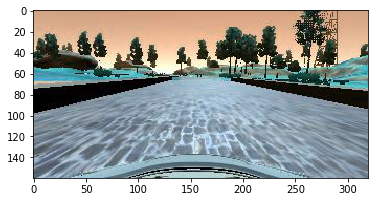

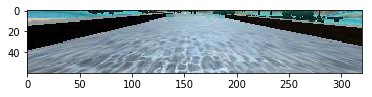

In [6]:
# Print image original and cropped for reference

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(imgSet[0])
plt.show()
plt.imshow(imgSet[0][60:120,:])
plt.show()

In [9]:
for index in range(len(imgSet)):
    imgSet[index] = imgSet[index][60:120,:]

## Data augmentation
Perform steps to augment the training data:
- Use captured images from the left camera with steering angle minus X degree
- Use captured images from the right camera with steering angle plux X degree
- Mirror center, right and left camera images and the related steering angle

## Split training and test data

## Define Model

## Train Model